<a href="https://colab.research.google.com/github/halaabbadi1/Project-4/blob/main/Project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Auther: Hala Abbadi**

In [31]:
import numpy as np
import pandas as pd
from sklearn import set_config
set_config(transform_output = 'pandas')

In [32]:
fpath = '/content/drive/MyDrive/adult.csv'
df = pd.read_csv(fpath)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


* Explore/clean the data

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [34]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [35]:
df.describe(include = 'object')

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


In [36]:
df['workclass'].value_counts()

,count
workclass,
Private,33906
Self-emp-not-inc,3862
Local-gov,3136
?,2799
State-gov,1981
Self-emp-inc,1695
Federal-gov,1432
Without-pay,21
Never-worked,10


In [37]:
df['workclass'] = df['workclass'].replace('?', 'Never-worked')

In [38]:
df['marital-status'].value_counts()

,count
marital-status,
Married-civ-spouse,22379
Never-married,16117
Divorced,6633
Separated,1530
Widowed,1518
Married-spouse-absent,628
Married-AF-spouse,37


In [39]:
df.isna().sum().sum()

0

In [40]:
dup_rows = df.duplicated()

In [41]:
df = df.drop_duplicates(keep = 'first')

In [42]:
df.duplicated().sum()

0

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

* Exploratory Visualizations

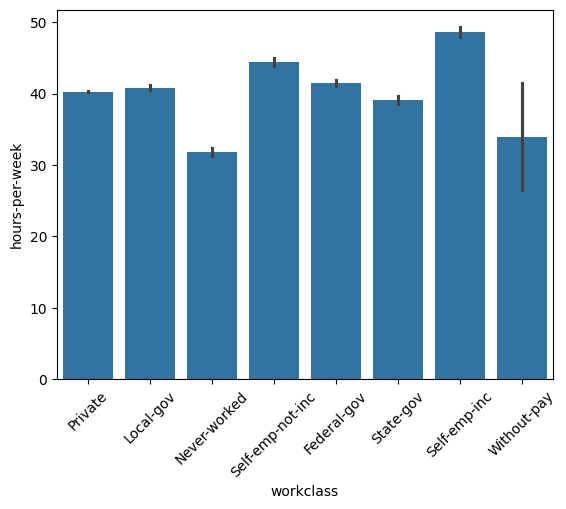

In [44]:
sns.barplot(data = df, x = 'workclass', y = 'hours-per-week')
plt.xticks(rotation=45);

* What is the target?

the income feature is the target

* What does one row represent?

one row represents a person

*
How many features does the data have?
How many rows are in the dataset?

this data set has 15 featuers and 48842 rows



In [45]:
target_col = 'income'
y = df[target_col].copy()
X = df.drop(columns = target_col).copy()

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 321)
X_train.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
22941,43,Private,124692,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States
14212,42,Self-emp-not-inc,116197,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States
22859,51,Private,125796,11th,7,Separated,Other-service,Not-in-family,Black,Female,0,0,40,Jamaica
32414,25,Local-gov,198813,Bachelors,13,Never-married,Adm-clerical,Other-relative,Black,Female,0,0,40,United-States
42201,24,Private,278130,Assoc-voc,11,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States


In [47]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
num_cols = X_train.select_dtypes("number").columns
# instantiate preprocessors
impute_median = SimpleImputer(strategy='median')
scaler = StandardScaler()
# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(impute_median, scaler)
# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols)

In [48]:
ohe_cols = X_train.select_dtypes('object').columns
# Instantiate the individual preprocessors
impute_na = SimpleImputer(strategy='constant', fill_value = "NA")
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Make pipeline with imputer and encoder
ohe_pipe = make_pipeline(impute_na, ohe_encoder)
# Making a ohe_tuple for ColumnTransformer
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)

* Preprocess data

In [49]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer([ohe_tuple, num_tuple], verbose_feature_names_out = False)
preprocessor

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object')),
                                ('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object'))],
                  verbose_feature_names_out=False)

* Fit and evaluate a default model

In [50]:
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()
feature_names

array(['workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay', 'education_10th',
       'education_11th', 'education_12th', 'education_1st-4th',
       'education_5th-6th', 'education_7th-8th', 'education_9th',
       'education_Assoc-acdm', 'education_Assoc-voc',
       'education_Bachelors', 'education_Doctorate', 'education_HS-grad',
       'education_Masters', 'education_Preschool',
       'education_Prof-school', 'education_Some-college',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent',
       'marital-status_Never-married', 'marital-status_Separated',
       'marital-status_Widowed', 'occupation_?',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec

In [51]:
X_train_tf = pd.DataFrame(preprocessor.transform(X_train), columns = feature_names, index = X_train.index)
X_train_tf.head()

,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,...,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
22941,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.316225,-0.616217,1.142317,-0.145073,-0.214456,-0.034492
14212,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.243334,-0.696497,-0.419762,-0.145073,-0.214456,-0.034492
22859,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.899354,-0.605784,-1.200801,-0.145073,-0.214456,-0.034492
32414,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,-0.995814,0.084246,1.142317,-0.145073,-0.214456,-0.034492
42201,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,-1.068705,0.833812,0.361278,-0.145073,-0.214456,-0.034492


In [52]:
X_test_tf = pd.DataFrame(preprocessor.transform(X_test), columns = feature_names, index = X_test.index)
X_test_tf.head()

,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,...,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
21490,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,-0.995814,0.683694,0.361278,0.301887,-0.214456,-0.034492
34393,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.534898,-0.465277,-0.029242,-0.145073,-0.214456,0.611149
3677,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.068705,1.107898,-0.029242,-0.145073,-0.214456,-0.034492
48004,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,-0.558468,0.654162,-0.029242,-0.145073,-0.214456,-2.455646
8207,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,-1.214487,-0.613212,1.142317,-0.145073,-0.214456,-0.841544


In [53]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
def classification_metrics(y_true, y_pred, label = '', output_dict = False, figsize = (8,4), normalize = 'true', cmap = 'Blues', colorbar = False):
  report = classification_report(y_true, y_pred)
  header = '-'*70
  print(header, f'Classification Metrics: {label}', header, sep = '\n')
  print(report)
  fig, axes = plt.subplots(ncols = 2, figsize = figsize)
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred, normalize = None, cmap = 'gist_gray', colorbar = colorbar, ax = axes[0]);
  axes[0].set_title('Row Counts')

  ConfusionMatrixDisplay.from_predictions(y_true, y_pred, normalize = normalize, cmap = cmap, colorbar = colorbar, ax = axes[1]);
  axes[1].set_title('Normalized Confusion Matrix')

  fig.tight_layout()
  plt.show()

  if output_dict == True:
    report_dict = classification_report(y_true, y_pred, output_dict = True)
    return report_dict
def evaluate_classification(model, X_train, y_train, X_test, y_test, figsize = (6,4), normalize = 'true', output_dict = False, cmap_train = 'Blues',
                            cmap_test = 'Reds', colorbar = False):
  y_train_pred = model.predict(X_train)
  results_train = classification_metrics(y_train, y_train_pred, output_dict = True, figsize = figsize, colorbar = colorbar, cmap = cmap_train,
                                         label = 'Training Data')
  print()
  y_test_pred = model.predict(X_test)
  results_test = classification_metrics(y_test, y_test_pred, output_dict = True, figsize = figsize, colorbar = colorbar, cmap = cmap_test,
                                         label = 'Testing Data')
  if output_dict == True:
    results_dict = {'train':results_train, 'trst': results_test}
    return results_dict

In [54]:
def get_importances(model, feature_names = None, name = 'Feature Importances', sort = False, ascending = True):
  if feature_names == None:
    feature_names = model.feature_names_in_
    importances = pd.Series(model.feature_importances_, index = feature_names, name = name)

    if sort == True:
      importances = importances.sort_values(ascending = ascending)

      return importances

In [55]:
def plot_importances(importances, top_n = None, figsize = (8,6)):
  if top_n == None:
    plot_vals = importances.sort_values()
    title = 'All Features - Ranked by Importance'
  else:
    plot_vals = importances.sort_values().tail(top_n)
    title = f'Top {top_n} Most Important Features'

  ax = plot_vals.plot(kind = 'barh', figsize = figsize)
  ax.set(xlabel = 'Importances', ylabel = 'Feature Names', title = title)
  return ax

----------------------------------------------------------------------
Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       1.00      1.00      1.00     27911
        >50K       1.00      1.00      1.00      8681

    accuracy                           1.00     36592
   macro avg       1.00      1.00      1.00     36592
weighted avg       1.00      1.00      1.00     36592



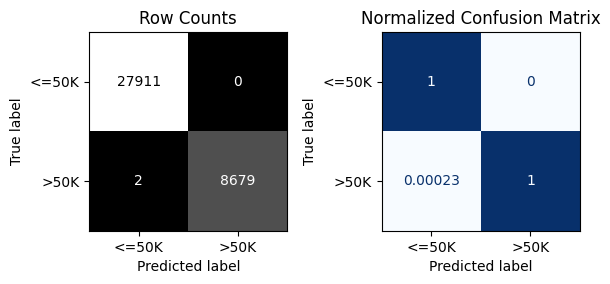


----------------------------------------------------------------------
Classification Metrics: Testing Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      9198
        >50K       0.73      0.62      0.67      3000

    accuracy                           0.85     12198
   macro avg       0.81      0.77      0.79     12198
weighted avg       0.84      0.85      0.85     12198



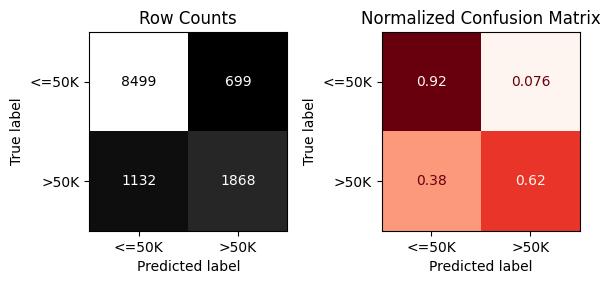

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_tf,y_train)
evaluate_classification(rf, X_train_tf, y_train, X_test_tf,y_test)

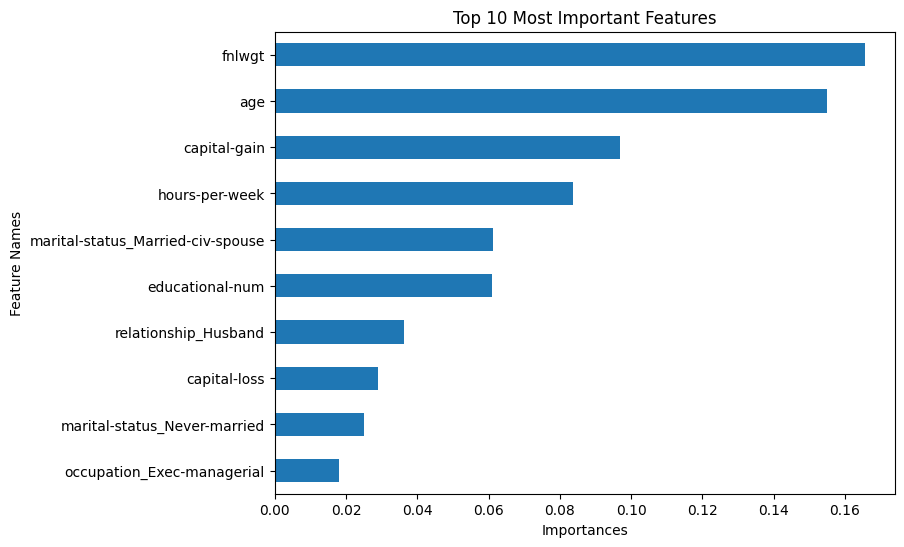

In [57]:
# Saving the feature importances
importances = get_importances(rf, sort = True, ascending = False, name = 'RandomForest Importances')
plot_importances(importances, top_n=10);

* Select 2 out of the top 10 features from your permutation importances and produce explanatory visualizations showing the relationship between the feature and the target.

<Axes: xlabel='income', ylabel='fnlwgt'>

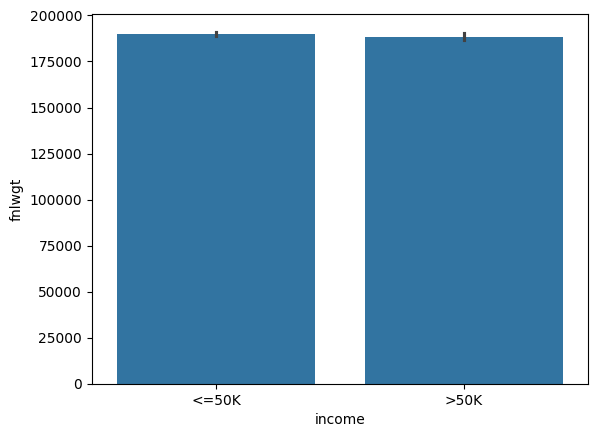

In [58]:
sns.barplot(data = df, x = 'income', y = 'fnlwgt')

<Axes: xlabel='income', ylabel='age'>

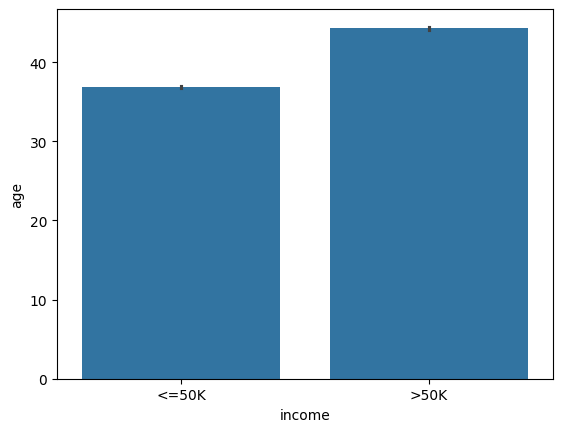

In [59]:
sns.barplot(data = df, x = 'income', y = 'age')

* the average age for the people whoes income is greater than or equal to 50k is 35 years old and the average age for people whoes income is less than 50k is 45

In [67]:
from imblearn.over_sampling import SMOTE, SMOTENC
smote = SMOTE()
X_train_sm, y_train_sm = smote.fit_resample(X_train_tf, y_train)
y_train_sm.value_counts()

,count
income,
>50K,27911
<=50K,27911


----------------------------------------------------------------------
Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       1.00      1.00      1.00     27911
        >50K       1.00      1.00      1.00     27911

    accuracy                           1.00     55822
   macro avg       1.00      1.00      1.00     55822
weighted avg       1.00      1.00      1.00     55822



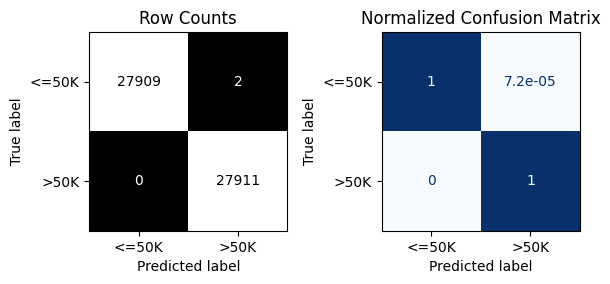


----------------------------------------------------------------------
Classification Metrics: Testing Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.90      0.89      0.90      9198
        >50K       0.68      0.70      0.69      3000

    accuracy                           0.85     12198
   macro avg       0.79      0.80      0.79     12198
weighted avg       0.85      0.85      0.85     12198



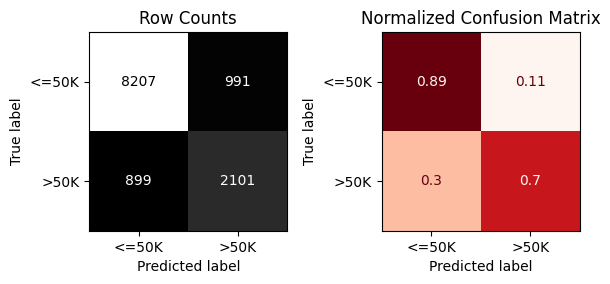

Training Time was: 0:00:16.198141


In [68]:
import datetime as dt
start = dt.datetime.now()
clf = RandomForestClassifier(random_state = 321)
clf.fit(X_train_sm, y_train_sm)
end = dt.datetime.now()
dur_baseline = end - start
evaluate_classification(clf, X_train_sm, y_train_sm, X_test_tf, y_test)
print(f'Training Time was: {dur_baseline}')

In [69]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
X_train_pca = pca.fit_transform(X_train_sm)
X_test_pca = pca.fit_transform(X_test_tf)
X_train_pca.head()

,pca0,pca1,pca2
0,0.156991,0.498802,-0.942257
1,-0.315557,-0.149942,-0.472098
2,-0.745885,-0.945109,0.405235
3,-0.370764,-0.507154,0.369781
4,-0.564445,-0.734892,0.563867


----------------------------------------------------------------------
Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       1.00      1.00      1.00     27911
        >50K       1.00      1.00      1.00     27911

    accuracy                           1.00     55822
   macro avg       1.00      1.00      1.00     55822
weighted avg       1.00      1.00      1.00     55822



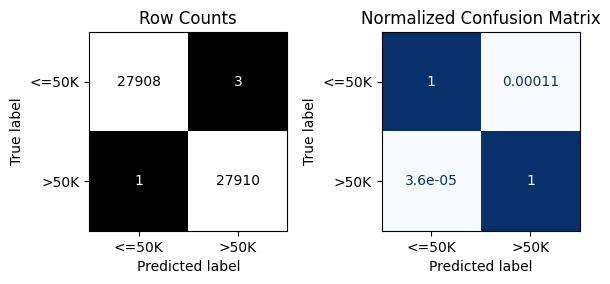


----------------------------------------------------------------------
Classification Metrics: Testing Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.94      0.63      0.76      9198
        >50K       0.44      0.88      0.58      3000

    accuracy                           0.69     12198
   macro avg       0.69      0.76      0.67     12198
weighted avg       0.82      0.69      0.72     12198



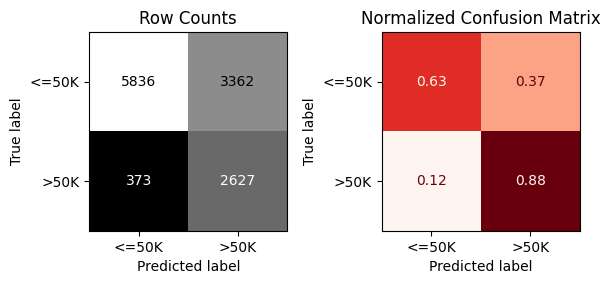

Training Time was: 0:00:24.667993


In [70]:
start = dt.datetime.now()
clf = RandomForestClassifier(random_state = 321)
clf.fit(X_train_pca, y_train_sm)
end = dt.datetime.now()
dur_pca = end - start
evaluate_classification(clf, X_train_pca, y_train_sm, X_test_pca, y_test)
print(f'Training Time was: {dur_pca}')